In [31]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np

In [ ]:
TICKER = 'NVDA'
BB_LEN = 20
DEVS = 1.5
LOOKBACK = 500

def get_data(ticker=TICKER, lookback=LOOKBACK):
    df = yf.download(ticker)
    df.columns = df.columns.get_level_values(0)

    # only return the subset of data you are interested in
    return df.iloc[-lookback:, :]

def add_bollinger_bands(df, devs=DEVS, bb_len=BB_LEN):

    # can change to ema (use MACD video/code for reference)
    df['BB_SMA'] = df['Close'].rolling(bb_len).mean()

    # get the standard deviation of the close prices for the period
    df['BB_STD'] = df['Close'].rolling(bb_len).std()

    df['Upper_Band'] = df['BB_SMA'] + (devs * df['BB_STD'])
    df['Lower_Band'] = df['BB_SMA'] - (devs * df['BB_STD'])

    plt.plot(df['Close'], color='blue')
    plt.plot(df['Upper_Band'], color='orange')
    plt.plot(df['Lower_Band'], color='orange')

    plt.title(f'{TICKER} Bollinger Bands. Len: {BB_LEN}, Deviations: {DEVS}');

    return df.dropna()

def add_strategy(df):
    df['Strategy'] = 0
    df['Strategy'] = np.where(
        df['Close'] > df['Upper_Band'], -1, 
        np.where(df['Close'] < df['Lower_Band'], 1, 0)
        )
    
    return df


def main():
    df = get_data()
    df = add_bollinger_bands(df)
    df = add_strategy(df)

    return df

df = main()

df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,BB_SMA,BB_STD,Upper_Band,Lower_Band,Strategy
Date,,,,,,,,,,
2023-06-02,39.301476,40.473715,39.032649,40.070976,482731000,32.471961,4.494376,39.213525,25.730397,-1
2023-06-05,39.145580,39.539322,38.681881,38.883749,396094000,32.996170,4.635729,39.949764,26.042576,0
2023-06-06,38.628914,39.134586,38.123242,38.804802,388729000,33.471012,4.704963,40.528456,26.413568,0
2023-06-07,37.454552,39.477449,37.335617,38.893768,511998000,33.916117,4.635736,40.869720,26.962513,0
2023-06-08,38.488991,38.842798,37.484542,37.703420,417772000,34.397254,4.583099,41.271902,27.522606,0
...,...,...,...,...,...,...,...,...,...,...
2025-04-28,108.730003,110.370003,106.019997,109.690002,207708500,105.270000,6.096531,114.414797,96.125203,0
2025-04-29,109.019997,110.199997,107.440002,107.669998,170444300,105.302000,6.115365,114.475047,96.128953,0
2025-04-30,108.919998,108.919998,104.080002,104.470001,235044600,105.240500,6.070061,114.345592,96.135408,0


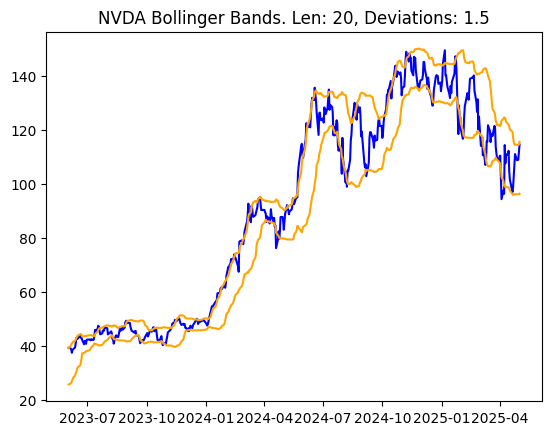